# Email Spam Detection

---



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Importing the dataset
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Checking for duplicate values
data.duplicated().sum()

415

In [8]:
# Dropping duplicate values
data.drop_duplicates(inplace=True)

<Axes: >

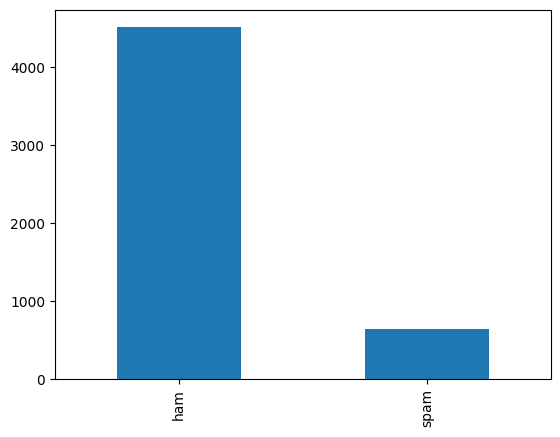

In [9]:
# Visualizing the number of spam and ham emails in the dataset
data['Category'].value_counts().plot.bar()

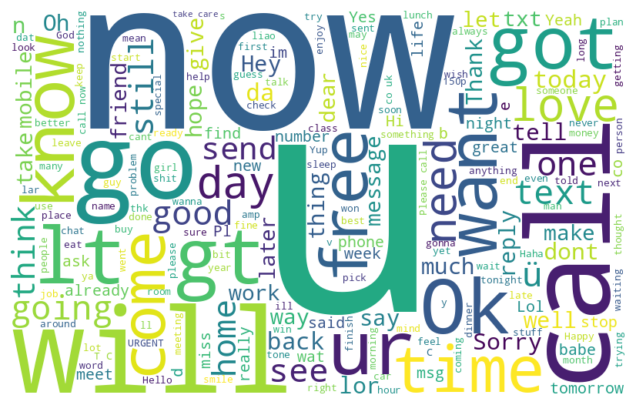

In [12]:
# Creating wordcloud of the dataset
from wordcloud import WordCloud
text=' '.join(data['Message'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Converting the Message column to lowercase
def lowerChange(text):
    return text.lower()

data['Message']=data['Message'].apply(lowerChange)
data['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5157, dtype: object

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


def Preprocess(text):
    # Removing punctations & numbers
    text=re.sub(r"[^a-zA-Z]", " ", text)

    # Tokenizing sentence into words
    words=word_tokenize(text)

    # Removing stopwords
    stop_words=set(stopwords.words("english"))
    words=[word for word in words if word not in stop_words]

    return words

data['text']=data['Message'].apply(Preprocess)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Category,Message,text
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,ham,will ü b going to esplanade fr home?,"[b, going, esplanade, fr, home]"
5569,ham,"pity, * was in mood for that. so...any other s...","[pity, mood, suggestions]"
5570,ham,the guy did some bitching but i acted like i'd...,"[guy, bitching, acted, like, interested, buyin..."


In [17]:
data.drop('Message',axis=1,inplace=True)
data['Category']=data['Category'].str.replace('ham','0').str.replace('spam','1').astype(int)
data

,Category,text
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


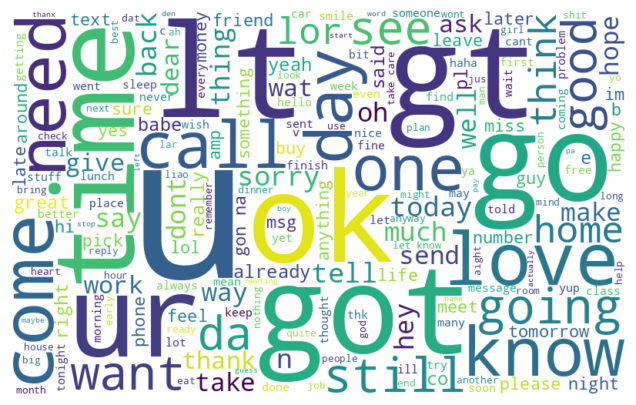

In [20]:
# Creating wordcloud of ham emails
ham=data[data['Category']==0]

text = ' '.join([' '.join(tokens) for tokens in ham['text']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

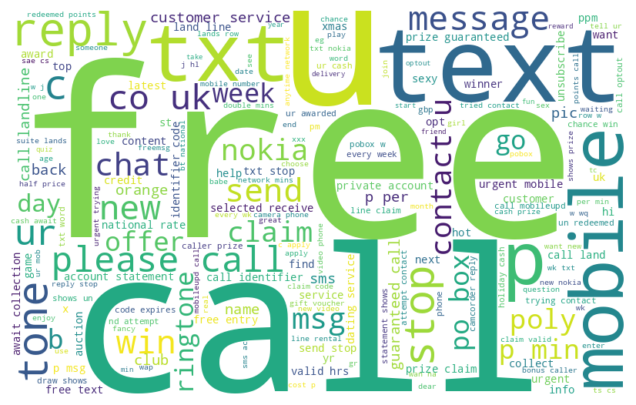

In [21]:
# Creating wordcloud of spam emails
spam=data[data['Category']==1]

text = ' '.join([' '.join(tokens) for tokens in spam['text']])  # Join the lists of tokens into a single string

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# Vectorizing the text
from sklearn.feature_extraction.text import CountVectorizer

countvector=CountVectorizer()
sentence_as_x=[' '.join(tokens) for tokens in data['text']]

X=countvector.fit_transform(sentence_as_x)

In [24]:
# Data Splitting
from sklearn.model_selection import train_test_split
y=data['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.toarray()
X_test=X_test.toarray()

In [27]:
# Data Modelling
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

#GaussianNb
gaussNB=GaussianNB()
gaussNB.fit(X_train,y_train)

#MultinomialNB
multiNB=MultinomialNB()
multiNB.fit(X_train,y_train)

#BernoulliNB
BerNB=BernoulliNB()
BerNB.fit(X_train,y_train)

BernoulliNB()

In [28]:
gaussNBPre=gaussNB.predict(X_test)
multiNBPre=multiNB.predict(X_test)
BerNBPre=BerNB.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_gauss = accuracy_score(y_test, gaussNBPre)
report_gauss = classification_report(y_test, gaussNBPre, target_names=['ham', 'spam'])

print('Accuracy of Gaussian model:', accuracy_gauss)
print(report_gauss)

accuracy_multi = accuracy_score(y_test, multiNBPre)
report_multi = classification_report(y_test, multiNBPre, target_names=['ham', 'spam'])

print('Accuracy of Multionomial model:', accuracy_multi)
print(report_multi)

accuracy_ber = accuracy_score(y_test, BerNBPre)
report_ber = classification_report(y_test, BerNBPre, target_names=['ham', 'spam'])

print('Accuracy of Bernoulli model:', accuracy_ber)
print(report_ber)

Accuracy of Gaussian model: 0.8963178294573644
              precision    recall  f1-score   support

         ham       0.98      0.90      0.94       896
        spam       0.57      0.88      0.69       136

    accuracy                           0.90      1032
   macro avg       0.77      0.89      0.81      1032
weighted avg       0.93      0.90      0.91      1032

Accuracy of Multionomial model: 0.9631782945736435
              precision    recall  f1-score   support

         ham       0.99      0.96      0.98       896
        spam       0.80      0.96      0.87       136

    accuracy                           0.96      1032
   macro avg       0.90      0.96      0.93      1032
weighted avg       0.97      0.96      0.96      1032

Accuracy of Bernoulli model: 0.9699612403100775
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       896
        spam       0.92      0.85      0.88       136

    accuracy                        

Bernoulli Naive Bayes Classifier model has the highest accuracy in predicting spam and ham emails.